### Projeto - Crimes em Boston

- __Nome:__ Gustavo Rezende Melo
- __Disciplina:__ Mineração de Dados
- __Projeto:__ Crimes em Boston

## Fase 3

### Importação das bibliotecas principais

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn import preprocessing
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

### Importação da base de dados

In [2]:
crimes = pd.read_csv('C:\\Users\\Gustavo\\OneDrive\\MBA\\MBA Data Science\\Projeto B2\\crimes\\crimes3.csv', sep=';', parse_dates=['DATA_OCORRENCIA'])

### Pré-processamento

Primeiramente, vamos verificar as estatísticas descritivas e contagem de valores da base de dados.

In [3]:
crimes.head()

,NUMERO_INCIDENTE,CODIGO_CRIME,CODIGO_GRUPO_CRIME,DESCRICAO_CRIME,DISTRITO,AREA_REPORTADA,TEVE_TIRO,DATA_OCORRENCIA,ANO,MES,DIA_DA_SEMANA,HORA,ALTO_RISCO,LATITUDE,LONGITUDE
0,I182070933,724,Auto Theft,AUTO THEFT,B2,330,0,2018-03-09 21:25:00,2018,9,Monday,21,0.0,42.306072,-71.082733
1,I182070932,3301,Verbal Disputes,VERBAL DISPUTE,B2,584,0,2018-03-09 20:39:00,2018,9,Monday,20,0.0,42.327016,-71.105551
2,I182070917,2647,Other,THREATS TO DO BODILY HARM,B2,901,0,2018-03-09 19:52:00,2018,9,Monday,19,0.0,42.333717,-71.096658
3,I182070915,614,Larceny From Motor Vehicle,LARCENY THEFT FROM MV - NON-ACCESSORY,B2,181,0,2018-02-09 18:00:00,2018,9,Sunday,18,0.0,42.325695,-71.068168
4,I182070908,522,Residential Burglary,BURGLARY - RESIDENTIAL - NO FORCE,B2,911,0,2018-03-09 18:38:00,2018,9,Monday,18,0.0,42.335062,-71.093168


In [4]:
crimes.describe()

,CODIGO_CRIME,TEVE_TIRO,ANO,MES,HORA,ALTO_RISCO,LATITUDE,LONGITUDE
count,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9822.000000,9823.000000,9823.000000
mean,2404.181615,0.006719,2017.994299,4.709559,13.188232,0.094889,39.184954,-65.816245
std,1158.172349,0.081697,0.080520,2.303406,6.336930,0.293077,11.087186,18.621326
min,111.000000,0.000000,2015.000000,1.000000,0.000000,0.000000,-1.000000,-71.112843
25%,1304.000000,0.000000,2018.000000,3.000000,9.000000,0.000000,42.312243,-71.089518
50%,3006.000000,0.000000,2018.000000,5.000000,14.000000,0.000000,42.320062,-71.082851
75%,3301.000000,0.000000,2018.000000,7.000000,18.000000,0.000000,42.329004,-71.075386
max,3831.000000,1.000000,2018.000000,12.000000,23.000000,1.000000,42.392146,0.000000


In [5]:
crimes.count()

NUMERO_INCIDENTE      9823
CODIGO_CRIME          9823
CODIGO_GRUPO_CRIME    9823
DESCRICAO_CRIME       9823
DISTRITO              9823
AREA_REPORTADA        9823
TEVE_TIRO             9823
DATA_OCORRENCIA       9823
ANO                   9823
MES                   9823
DIA_DA_SEMANA         9823
HORA                  9823
ALTO_RISCO            9822
LATITUDE              9823
LONGITUDE             9823
dtype: int64

In [6]:
crimes.dtypes

NUMERO_INCIDENTE              object
CODIGO_CRIME                   int64
CODIGO_GRUPO_CRIME            object
DESCRICAO_CRIME               object
DISTRITO                      object
AREA_REPORTADA                object
TEVE_TIRO                      int64
DATA_OCORRENCIA       datetime64[ns]
ANO                            int64
MES                            int64
DIA_DA_SEMANA                 object
HORA                           int64
ALTO_RISCO                   float64
LATITUDE                     float64
LONGITUDE                    float64
dtype: object

Vamos agora acrescentar as informações do dia do mês que a ocorrência aconteceu e corrigir o número do mês. Vamos também alterar o formato do valor da área reportada para numérico e substituir os valores dos dias da semana por valores numéricos

In [7]:
crimes['DIA_MES']=pd.DatetimeIndex(crimes['DATA_OCORRENCIA']).day
crimes['MES']=pd.DatetimeIndex(crimes['DATA_OCORRENCIA']).month

In [8]:
crimes['AREA_REPORTADA']=pd.to_numeric(crimes['AREA_REPORTADA'],errors='coerce')

In [10]:
crimes.replace(regex={'Sunday': 1, 'Monday': 2, 'Tuesday': 3, 'Wednesday': 4, 'Thursday': 5, 'Friday': 6, 'Saturday': 7}, inplace=True)

In [11]:
crimes.head()

,NUMERO_INCIDENTE,CODIGO_CRIME,CODIGO_GRUPO_CRIME,DESCRICAO_CRIME,DISTRITO,AREA_REPORTADA,TEVE_TIRO,DATA_OCORRENCIA,ANO,MES,DIA_DA_SEMANA,HORA,ALTO_RISCO,LATITUDE,LONGITUDE,DIA_MES
0,I182070933,724,Auto Theft,AUTO THEFT,B2,330.0,0,2018-03-09 21:25:00,2018,3,2,21,0.0,42.306072,-71.082733,9
1,I182070932,3301,Verbal Disputes,VERBAL DISPUTE,B2,584.0,0,2018-03-09 20:39:00,2018,3,2,20,0.0,42.327016,-71.105551,9
2,I182070917,2647,Other,THREATS TO DO BODILY HARM,B2,901.0,0,2018-03-09 19:52:00,2018,3,2,19,0.0,42.333717,-71.096658,9
3,I182070915,614,Larceny From Motor Vehicle,LARCENY THEFT FROM MV - NON-ACCESSORY,B2,181.0,0,2018-02-09 18:00:00,2018,2,1,18,0.0,42.325695,-71.068168,9
4,I182070908,522,Residential Burglary,BURGLARY - RESIDENTIAL - NO FORCE,B2,911.0,0,2018-03-09 18:38:00,2018,3,2,18,0.0,42.335062,-71.093168,9


Agora vamos eliminar as linhas que possuem valores vazios, verificar os valores e plotar um gráfico para observar como está a distribuição de latitude e longitude.

In [12]:
crimes2=crimes.dropna()

In [13]:
crimes2.count()

NUMERO_INCIDENTE      9120
CODIGO_CRIME          9120
CODIGO_GRUPO_CRIME    9120
DESCRICAO_CRIME       9120
DISTRITO              9120
AREA_REPORTADA        9120
TEVE_TIRO             9120
DATA_OCORRENCIA       9120
ANO                   9120
MES                   9120
DIA_DA_SEMANA         9120
HORA                  9120
ALTO_RISCO            9120
LATITUDE              9120
LONGITUDE             9120
DIA_MES               9120
dtype: int64

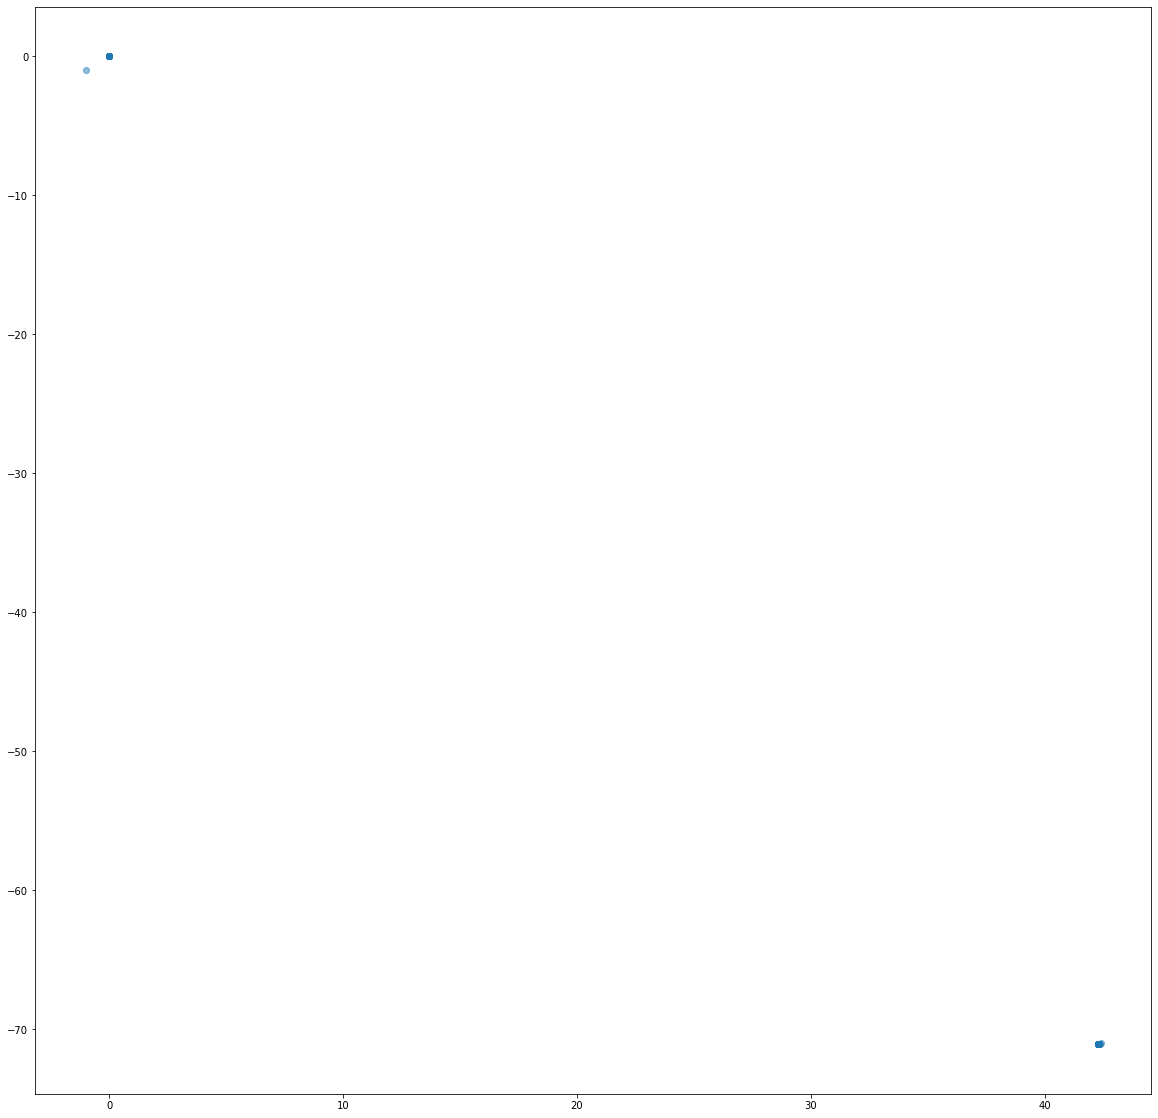

In [14]:
plt.figure(figsize=(20,20))
plt.scatter(crimes2['LATITUDE'], crimes2['LONGITUDE'], alpha=0.5)
plt.show()

Temos valores de 0 e 1 na latitude e na longitude que estão distorcendo o gráfico. Vamos remover os valores que não desejamos: -1, 0 e 1.

In [15]:
crimes2['LATITUDE'].replace(-1,None, inplace=True)
crimes2['LONGITUDE'].replace(-1,None, inplace=True)
crimes2['LATITUDE'].replace(1,None, inplace=True)
crimes2['LONGITUDE'].replace(1,None, inplace=True)
crimes2['LATITUDE'].replace(0,None, inplace=True)
crimes2['LONGITUDE'].replace(0,None, inplace=True)

In [16]:
crimes2.dropna()

,NUMERO_INCIDENTE,CODIGO_CRIME,CODIGO_GRUPO_CRIME,DESCRICAO_CRIME,DISTRITO,AREA_REPORTADA,TEVE_TIRO,DATA_OCORRENCIA,ANO,MES,DIA_DA_SEMANA,HORA,ALTO_RISCO,LATITUDE,LONGITUDE,DIA_MES
0,I182070933,724,Auto Theft,AUTO THEFT,B2,330.0,0,2018-03-09 21:25:00,2018,3,2,21,0.0,42.306072,-71.082733,9
1,I182070932,3301,Verbal Disputes,VERBAL DISPUTE,B2,584.0,0,2018-03-09 20:39:00,2018,3,2,20,0.0,42.327016,-71.105551,9
2,I182070917,2647,Other,THREATS TO DO BODILY HARM,B2,901.0,0,2018-03-09 19:52:00,2018,3,2,19,0.0,42.333717,-71.096658,9
3,I182070915,614,Larceny From Motor Vehicle,LARCENY THEFT FROM MV - NON-ACCESSORY,B2,181.0,0,2018-02-09 18:00:00,2018,2,1,18,0.0,42.325695,-71.068168,9
4,I182070908,522,Residential Burglary,BURGLARY - RESIDENTIAL - NO FORCE,B2,911.0,0,2018-03-09 18:38:00,2018,3,2,18,0.0,42.335062,-71.093168,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9818,I182011227,3160,Fire Related Reports,FIRE REPORT - CAR,B2,301.0,0,2018-12-02 02:14:00,2018,12,2,20,0.0,42.323239,-71.073800,2
9819,I182010932,3160,Fire Related Reports,FIRE REPORT - CAR,B2,321.0,0,2018-10-02 17:56:00,2018,10,7,7,0.0,42.316966,-71.082541,2
9820,I182009116,3160,Fire Related Reports,FIRE REPORT - CAR,B2,289.0,0,2018-04-02 00:54:00,2018,4,1,6,0.0,42.324840,-71.090424,2
9821,I182004178,3160,Fire Related Reports,FIRE REPORT - CAR,B2,306.0,0,2018-01-16 14:24:00,2018,1,3,5,0.0,42.324840,-71.090424,16


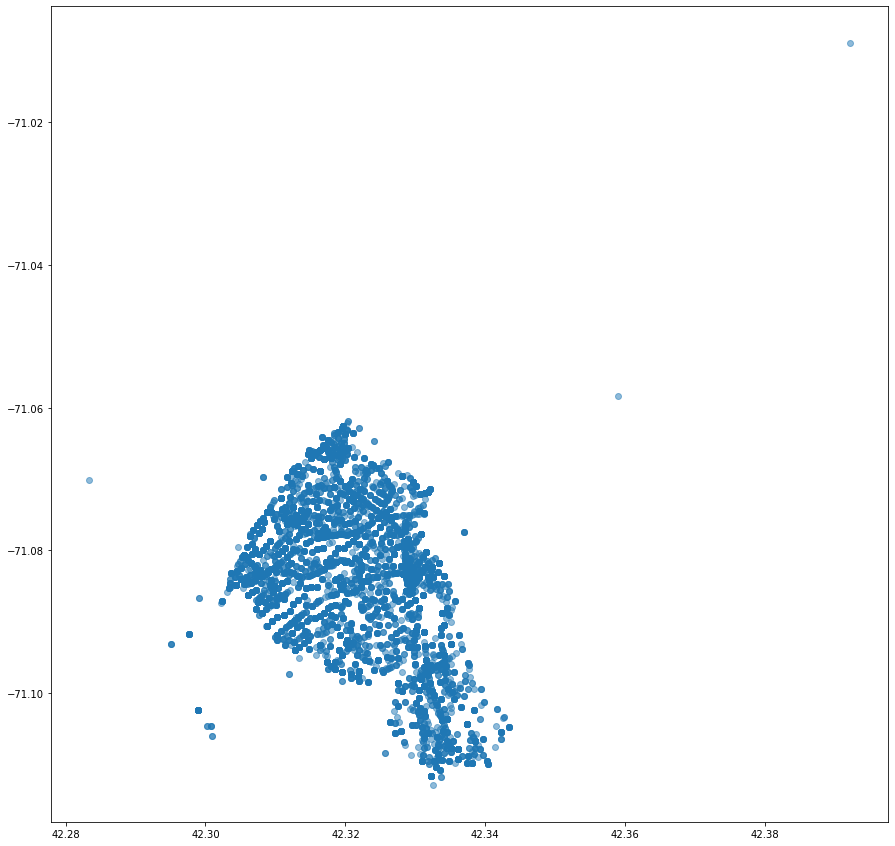

In [180]:
plt.figure(figsize=(15,15))
plt.scatter(crimes2['LATITUDE'], crimes2['LONGITUDE'], alpha=0.5)
plt.show()

O gráfico ainda possui valores distantes, mas como estes não devem atrapalhar o desenvolvimento, serão mantidos.

### Manipulação da base

Selecionamos os trechos que iremos utilizar para fazer a clusterização. Nossa aplicação será para avaliar a relação entre o codigo de crime e a localização.

In [18]:
X=crimes2[['CODIGO_CRIME', 'LATITUDE','LONGITUDE']].copy()

In [19]:
X.head()

,CODIGO_CRIME,LATITUDE,LONGITUDE
0,724,42.306072,-71.082733
1,3301,42.327016,-71.105551
2,2647,42.333717,-71.096658
3,614,42.325695,-71.068168
4,522,42.335062,-71.093168


Agora vamos normalizar os dados.

In [20]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [21]:
X

array([[-1.42147687, -1.71505461,  0.16480514],
       [ 0.80654317,  0.59057101, -2.01639849],
       [ 0.24110852,  1.32823515, -1.16633217],
       ...,
       [ 0.68463754,  0.35092214, -0.57041626],
       [ 0.68463754,  0.35092214, -0.57041626],
       [ 0.68463754,  1.067437  , -1.79405094]])

### Aplicação da técnica
- __Nome da técnica:__ DBSCAN
- __Referências complementares:__ https://scikit-learn.org/stable/user_guide.html

Aplicando a técnica para X obtemos um vetor "labels" que trás o grupo gerado pela técnica.

In [77]:
Dbscan = DBSCAN().fit(X)
labels = Dbscan.labels_
print(labels)

[0 0 0 ... 0 0 0]


Vamos gerar o gráfico com as cores representando os diferentes grupos gerados pela técnica

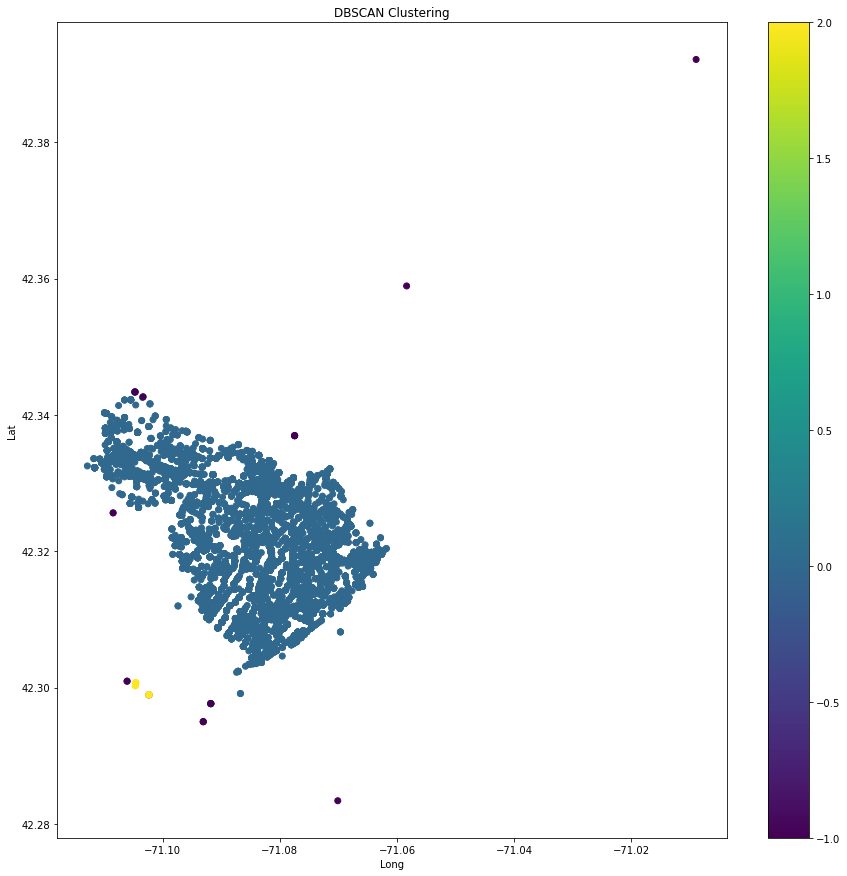

In [78]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
scatter = ax.scatter(crimes2['LONGITUDE'],crimes2['LATITUDE'],
                     c=labels)
ax.set_title('DBSCAN Clustering')
ax.set_xlabel('Long')
ax.set_ylabel('Lat')
plt.colorbar(scatter)

Não conseguimos extrair muita informação do gráfico pois as informações estão muito densas e o algoritmo não consegue agrupar muito bem. Vamos diminuir o parâmetro de distância entre os pontos e aumentar a quantidade de amostras para classificar como um grupo para tentar melhorar a performance.

In [79]:
Dbscan = DBSCAN(eps=0.2, min_samples=15 ).fit(X)
labels2 = Dbscan.labels_
print(labels2)

[ 0 -1 23 ...  4  4  4]


Vamos gerar o gráfico com as cores representando os diferentes grupos gerados pela técnica

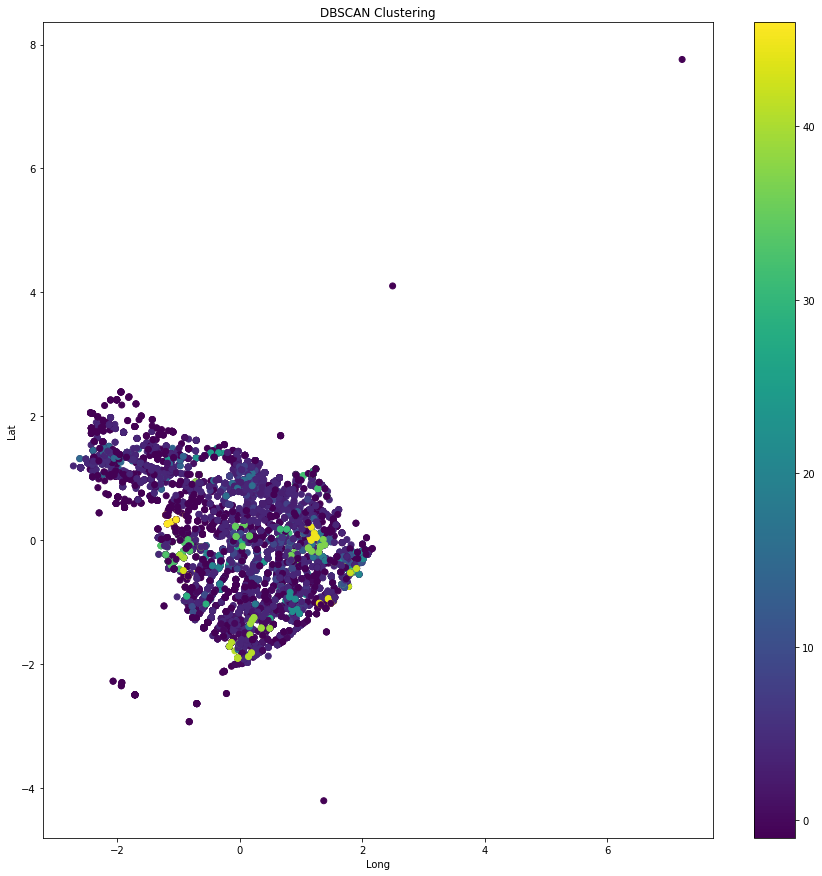

In [153]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
scatter = ax.scatter(X[:,2],X[:,1],
                     c=labels2)
ax.set_title('DBSCAN Clustering')
ax.set_xlabel('Long')
ax.set_ylabel('Lat')
plt.colorbar(scatter)

Agora podemos ver que temos alguns pontos em que as ocorrencias se agrupam. Esses locais podem ser pontos recorrentes de determinadas ocorrências.
<br>
<br>Para efeito de comparação, vamos aplicar a técnica de K-Means.

### Aplicação da técnica
- __Nome da técnica:__ K-Means
- __Referências complementares:__ https://scikit-learn.org/stable/user_guide.html

Vamos aplicar a técnica, inicialmente para 2 clusters e avaliar.

In [103]:
k_means2 = KMeans(n_clusters=2, random_state=0)

In [104]:
k_means2.fit(X)

KMeans(n_clusters=2, random_state=0)

Nomeando o vetor com os grupos criados pelo algoritmo temos:

In [120]:
k_means2_labels = k_means2.labels_
k_means2_labels

array([1, 0, 0, ..., 0, 0, 0])

Atribuindo as coordenadas dos centroides utilizados no algoritmo temos:

In [121]:
k_means2_cluster_centers = k_means2.cluster_centers_
k_means2_cluster_centers

array([[ 0.02176143,  0.91100991, -0.73177847],
       [-0.01549486, -0.64866916,  0.52105045]])

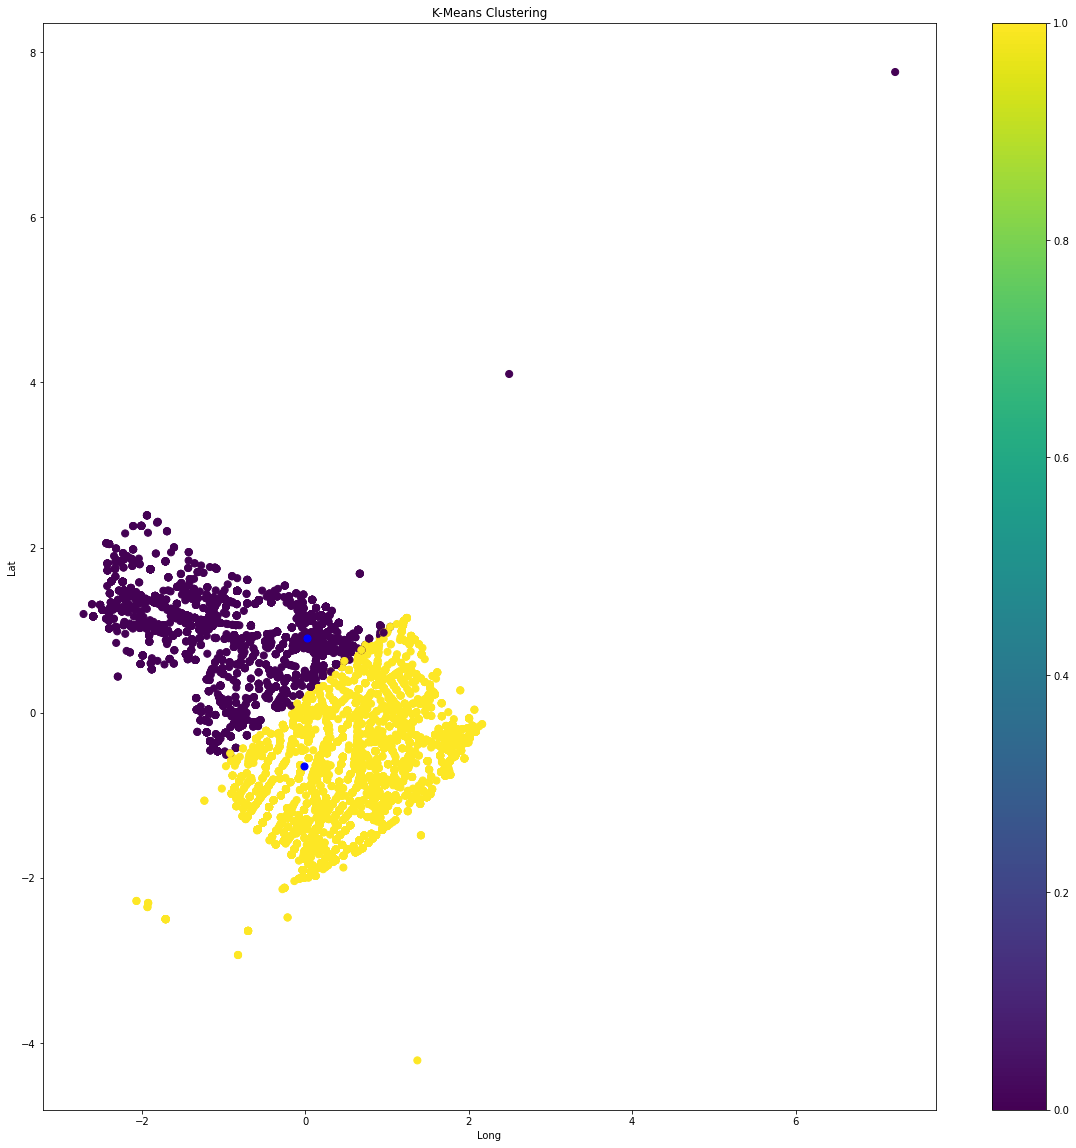

In [126]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
scatter = ax.scatter(X[:,2],X[:,1],
                     c=k_means2_labels,s=50)
plt.scatter(k_means2_cluster_centers[:,0],k_means2_cluster_centers[:,1], c='blue', s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Long')
ax.set_ylabel('Lat')
plt.colorbar(scatter)

Vamos aplicar a técnica para 4 clusters e avaliar.

In [174]:
from sklearn.cluster import KMeans
k_means4 = KMeans(n_clusters=4, random_state=0)

In [175]:
k_means4.fit(X)

KMeans(n_clusters=4, random_state=0)

Nomeando o vetor com os grupos criados pelo algoritmo temos:

In [176]:
k_means4_labels = k_means4.labels_
k_means4_labels

array([1, 3, 3, ..., 0, 0, 3])

Atribuindo as coordenadas dos centroides utilizados no algoritmo temos:

In [177]:
k_means4_cluster_centers = k_means4.cluster_centers_
k_means4_cluster_centers

array([[ 0.67588633,  0.37097386,  0.61469161],
       [-1.28813811, -0.24699826,  0.32065519],
       [ 0.65023691, -1.0626174 ,  0.06993495],
       [ 0.11469443,  1.18597114, -1.49174251]])

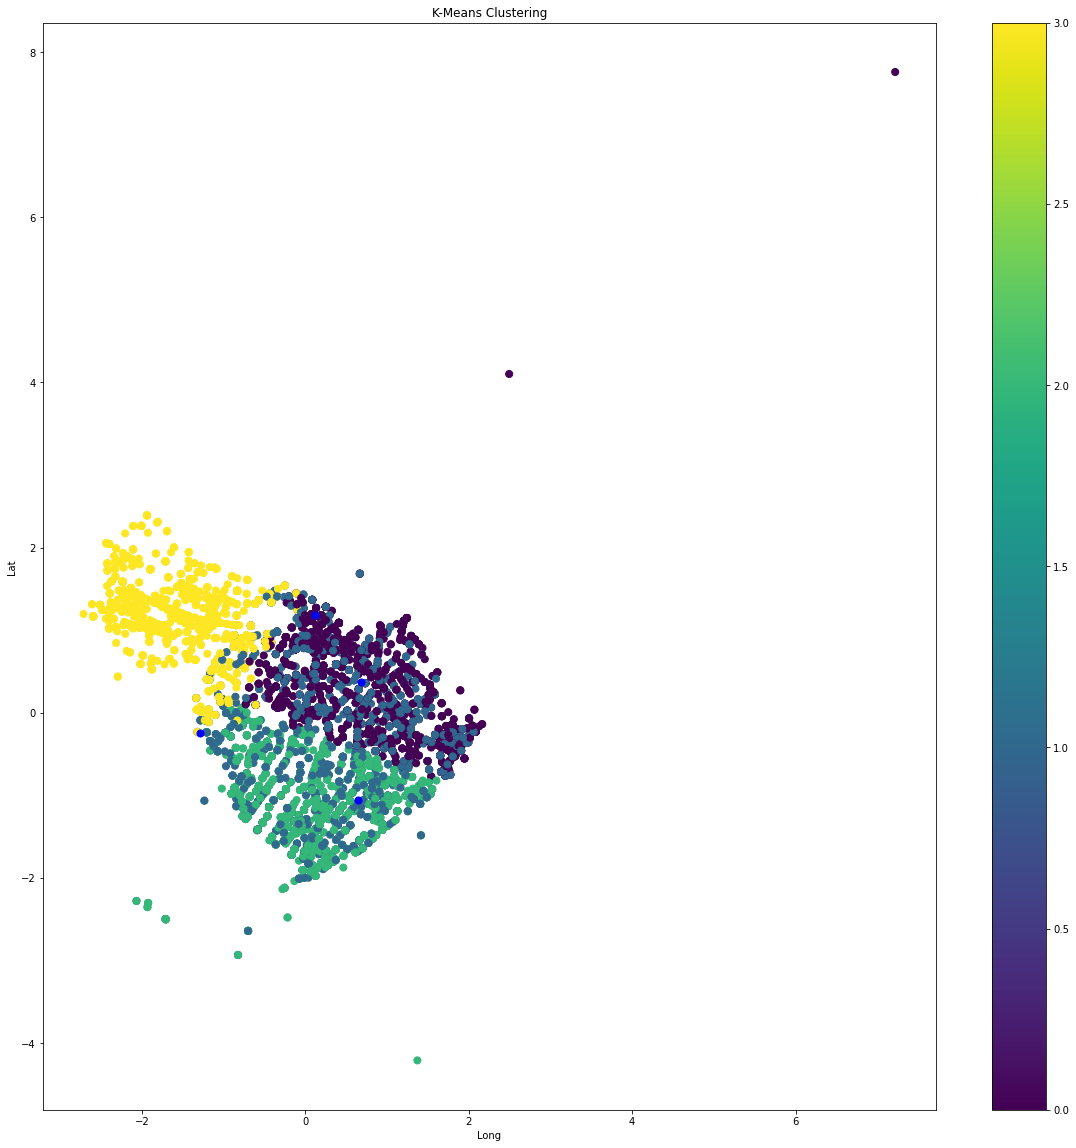

In [179]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
scatter = ax.scatter(X[:,2],X[:,1],
                     c=k_means4_labels,s=50)
plt.scatter(k_means4_cluster_centers[:,0],k_means4_cluster_centers[:,1], c='blue', s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Long')
ax.set_ylabel('Lat')
plt.colorbar(scatter)

Vemos que com 4 clusters começa a ficar mais clara a divisão das regiões. Temos 3 regiões bem definidas e uma que se sobrepõe a outras duas.

### Análises e conclusões

A partir das análises podemos observar que, após algumas manipulações de variáveis, conseguimos chegar a alguns resultados interessantes. 
<br>Vemos que conseguimos agrupar as ocorrências por regiões, o que pode favorecer a atuação policial para o combate ao crime.
<br>Após observar os resultados, vemos que combinar a aplicação das técnicas pode dar mais informações e auxiliar na tomada de decisões, sendo dessa maneira, complementares.